In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [5]:
df = pd.read_csv(r"C:\Users\devik\Downloads\Airbnb_Open_Data.csv", low_memory=False)

In [6]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [8]:
df.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

In [9]:
df[df['neighbourhood group']=='brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,6/24/2019,1.34,4.0,3.0,47.0,NaN,NaN


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.drop(['house_rules','license'],axis=1,inplace=True)
df['price']=df['price'].str.replace('$','',regex=False)
df['service fee']=df['service fee'].str.replace(',','',regex=False)
df.rename(columns={
    'price':'price_$',
    'service fee':'service_fee_$'

_IncompleteInputError: incomplete input (1044302208.py, line 6)

In [12]:
df.drop_duplicates(inplace=True)
df.drop(['house_rules','license'],axis=1,inplace=True)
df['price']=df['price'].str.replace('$','',regex=False)
df['service fee']=df['service fee'].str.replace(',','',regex=False)
df.rename(columns={
    'price':'price_$',
    'service fee':'service_fee_$'
},inplace=True)
df.dropna(inplace=True)
df['price_$']=df['price_'$].astype(float)

SyntaxError: invalid syntax (2220310867.py, line 10)

In [16]:
df.drop_duplicates(inplace=True)
df.drop(['house_rules','license'],axis=1,inplace=True)
df['price']=df['price'].str.replace('$','',regex=False)
df['service fee']=df['service fee'].str.replace(',','',regex=False)
df.rename(columns={
    'price':'price_$',
    'service fee':'service_fee_$'
},inplace=True)
df.dropna(inplace=True)
df['price_$']=df['price_$'].astype(float)
df['service_fee_$']=df['service_fee_$'].astype(float)
df['id']=df['id'].astype(str)
df['host id']=df['host id'].astype(str)
df['last review']=pd.to_datetime(df['last review'])
df['Construction year']=df['Construction year'].astype(int)
df.loc[df['neighbourhood group']=='brookln','neighbourhood group']='Brooklyn'
df=df.drop(df[df['availability 365']>500].index)

ValueError: could not convert string to float: '1,060 '

In [17]:
df.duplicated().value_counts()

False    83412
Name: count, dtype: int64

In [18]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Drop columns only if they exist
cols_to_drop = ['house_rules', 'license']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

# Clean 'price' column
if 'price' in df.columns:
    df['price'] = df['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# Clean 'service fee' column
if 'service fee' in df.columns:
    df['service fee'] = df['service fee'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# Rename columns safely
df.rename(columns={
    'price': 'price_$',
    'service fee': 'service_fee_$'
}, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Convert data types safely
if 'price_$' in df.columns:
    df['price_$'] = pd.to_numeric(df['price_$'], errors='coerce')
if 'service_fee_$' in df.columns:
    df['service_fee_$'] = pd.to_numeric(df['service_fee_$'], errors='coerce')

# Convert IDs to string
if 'id' in df.columns:
    df['id'] = df['id'].astype(str)
if 'host id' in df.columns:
    df['host id'] = df['host id'].astype(str)

# Convert 'last review' to datetime if exists
if 'last review' in df.columns:
    df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

# Construction year to int (only if numeric)
if 'Construction year' in df.columns:
    df['Construction year'] = pd.to_numeric(df['Construction year'], errors='coerce').fillna(0).astype(int)

# Fix neighbourhood spelling (Brooklyn)
if 'neighbourhood group' in df.columns:
    df['neighbourhood group'] = df['neighbourhood group'].str.replace('brookln', 'Brooklyn', case=False)

# Fix availability column (ensure correct name)
for col in df.columns:
    if 'availability' in col:  # catch variations like 'availability_365'
        df = df[df[col] <= 500]
        break  # apply only on the correct column


In [19]:
df.duplicated().value_counts()

False    83411
Name: count, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83411 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83411 non-null  object        
 1   NAME                            83411 non-null  object        
 2   host id                         83411 non-null  object        
 3   host_identity_verified          83411 non-null  object        
 4   host name                       83411 non-null  object        
 5   neighbourhood group             83411 non-null  object        
 6   neighbourhood                   83411 non-null  object        
 7   lat                             83411 non-null  float64       
 8   long                            83411 non-null  float64       
 9   country                         83411 non-null  object        
 10  country code                    83411 non-null  object        
 11  instan

In [21]:
df.describe()

,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83411.000000,83411.000000,83411.000000,68732.000000,0.0,83411.000000,83411.000000,83411,83411.000000,83411.000000,83411.000000,83411.000000
mean,40.727353,-73.948500,2012.488509,524.999753,NaN,7.405366,32.276642,2019-06-08 22:01:01.027922176,1.377584,3.278776,7.032682,141.742612
min,40.504560,-74.249840,2003.000000,50.000000,NaN,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687650,-73.982110,2007.000000,288.000000,NaN,2.000000,3.000000,2018-10-26 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953720,2012.000000,524.000000,NaN,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762595,-73.930815,2017.000000,760.000000,NaN,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,2022.000000,999.000000,NaN,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056324,0.050347,5.760870,273.245255,NaN,28.102221,51.957777,NaN,1.751041,1.283599,29.551590,133.368399


In [22]:
print("Property Types:\n", df['property_type'].value_counts())

plt.figure(figsize=(8,5))
sns.countplot(y="property_type", data=df, order=df['property_type'].value_counts().index[:10])
plt.title("Top 10 Property Types")
plt.show()

KeyError: 'property_type'

In [25]:
if 'property_type' in df.columns:
    print("Property Types:\n", df['property_type'].value_counts())
    plt.figure(figsize=(8,5))
    sns.countplot(y="property_type", data=df, order=df['property_type'].value_counts().index[:10])
    plt.title("Top 10 Property Types")
    plt.show()
elif 'room_type' in df.columns:  # fallback
    print("Room Types:\n", df['room_type'].value_counts())
    plt.figure(figsize=(8,5))
    sns.countplot(y="room_type", data=df, order=df['room_type'].value_counts().index[:10])
    plt.title("Room Types")
    plt.show()

In [26]:
plt.show()


In [27]:
property_types=df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44163
Private room,37494
Shared room,1646
Hotel room,108


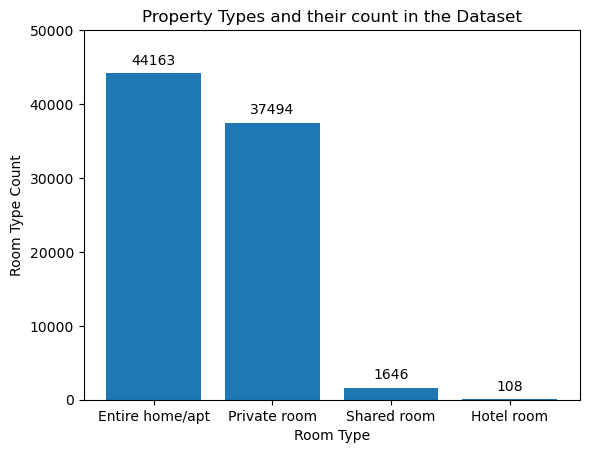

In [28]:
room_type_bar=plt.bar(property_types.index,property_types.loc[:,"count"]);
plt.bar_label(room_type_bar,labels=property_types.loc[:,"count"],padding=4);
plt.ylim([0,50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Types and their count in the Dataset');

Listings per neighborhood group:
 neighbourhood group
Brooklyn         34636
Manhattan        34566
Queens           11126
Bronx             2267
Staten Island      816
Name: count, dtype: int64


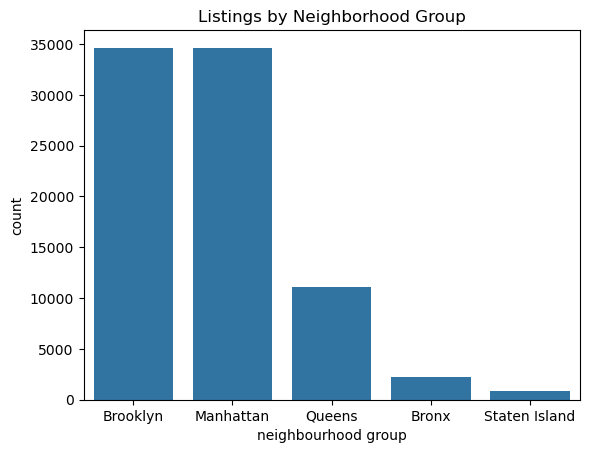

In [29]:
print("Listings per neighborhood group:\n", df['neighbourhood group'].value_counts())
sns.countplot(x="neighbourhood group", data=df, order=df['neighbourhood group'].value_counts().index)
plt.title("Listings by Neighborhood Group")
plt.show()

Average price by neighborhood group:
 neighbourhood group
Bronx            533.175812
Staten Island    531.305556
Brooklyn         525.873527
Manhattan        524.009410
Queens           523.207144
Name: price_$, dtype: float64


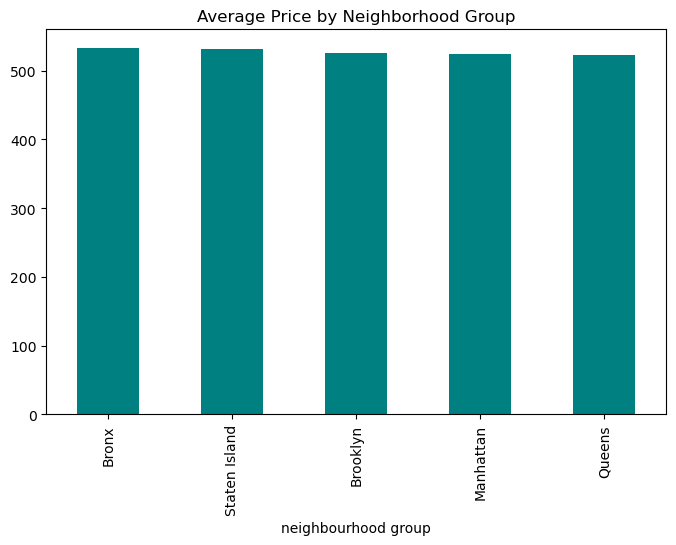

In [32]:
avg_prices = df.groupby("neighbourhood group")["price_$"].mean().sort_values(ascending=False)
print("Average price by neighborhood group:\n", avg_prices)
avg_prices.plot(kind="bar", figsize=(8,5), color="teal")
plt.title("Average Price by Neighborhood Group")
plt.show()


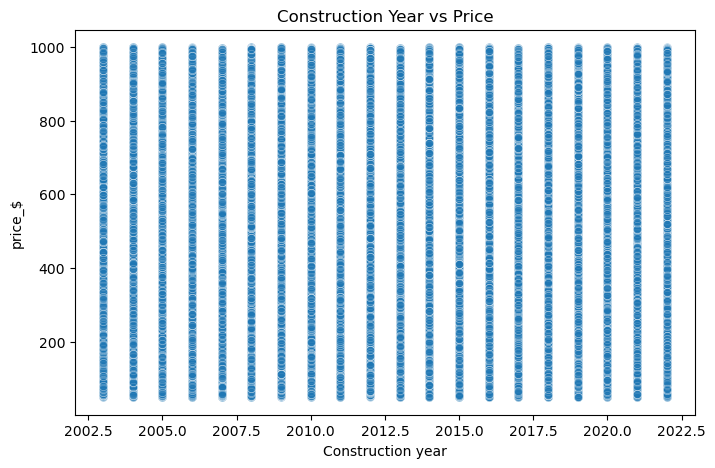

In [34]:
if 'Construction year' in df.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x="Construction year", y="price_$", data=df, alpha=0.5)
    plt.title("Construction Year vs Price")
    plt.show()


Top 10 Hosts:
 host id
56457739998    1
80014485718    1
52335172823    1
92037596077    1
45498551794    1
90821839709    1
79384379533    1
75527839483    1
1280143094     1
18824631834    1
Name: count, dtype: int64


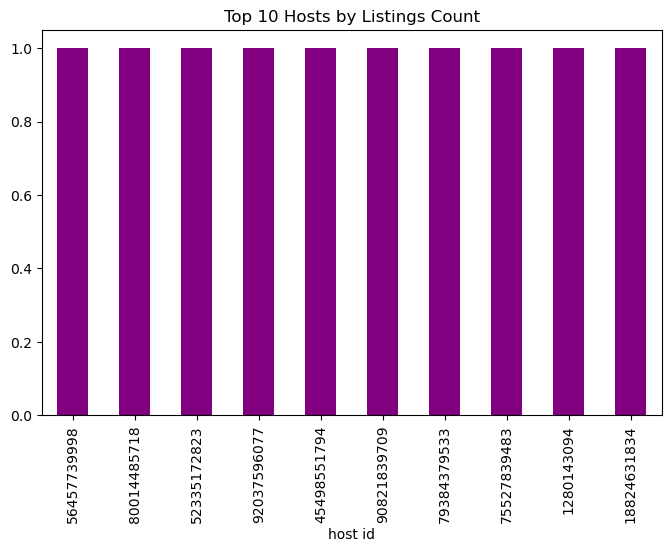

In [35]:
top_hosts = df['host id'].value_counts().head(10)
print("Top 10 Hosts:\n", top_hosts)

top_hosts.plot(kind="bar", figsize=(8,5), color="purple")
plt.title("Top 10 Hosts by Listings Count")
plt.show()


In [39]:
review=df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.284186
unconfirmed,3.273370


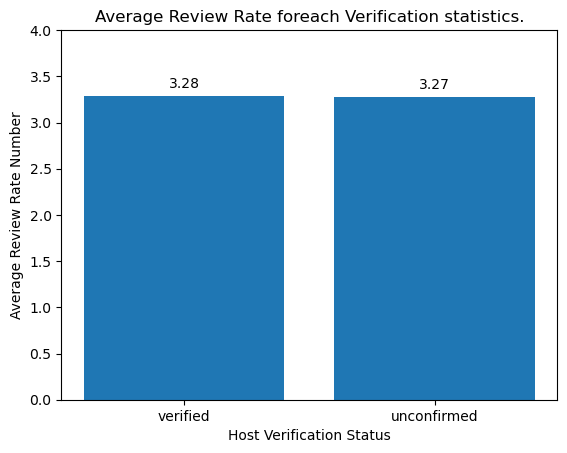

In [48]:
review_bar=plt.bar(review.index,review.loc[:,"review rate number"]);
plt.bar_label(review_bar,labels=round(review.loc[:,"review rate number"],2),padding=4);
plt.ylim([0,4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate foreach Verification statistics.');


In [46]:
df['price_$'].corr(df['service_fee_$'])


nan

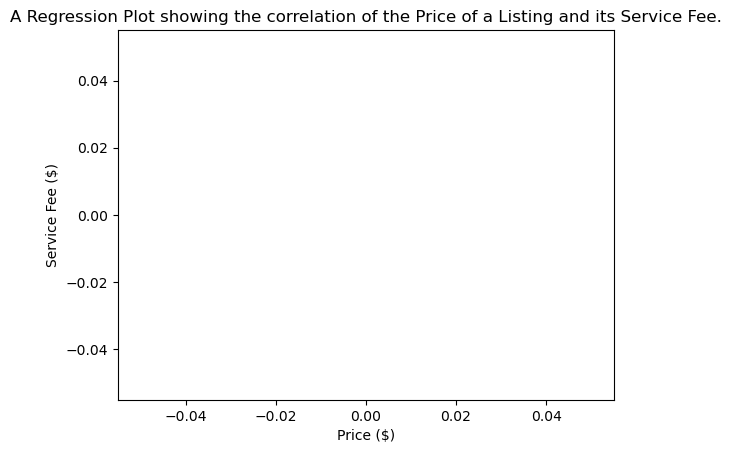

In [51]:
sns.regplot(df,x='price_$',y='service_fee_$');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A Regression Plot showing the correlation of the Price of a Listing and its Service Fee.');

In [52]:
ARRN=df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274905
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268846
                    Hotel room                 3.500000
                    Private room               3.285605
                    Shared room                3.261976
Queens              Entire home/apt            3.350045
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286

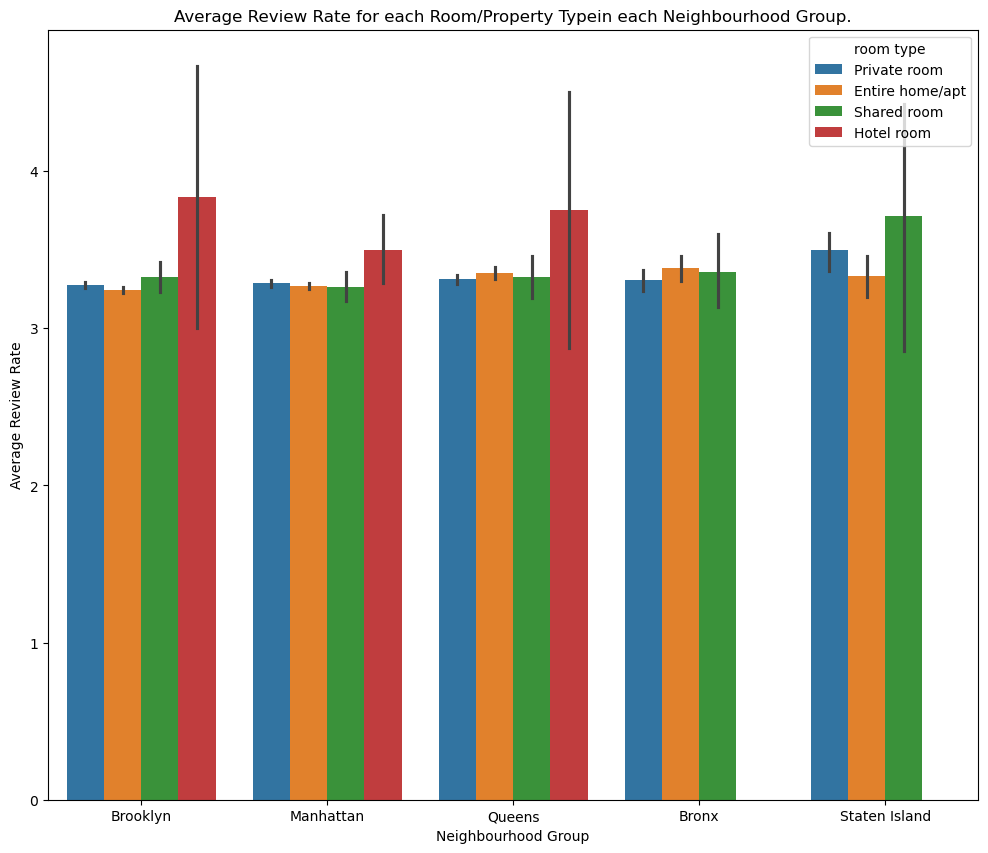

In [54]:
plt.figure(figsize=[12,10]);
sns.barplot(data=df,x='neighbourhood group',y='review rate number',hue='room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each Room/Property Typein each Neighbourhood Group.');

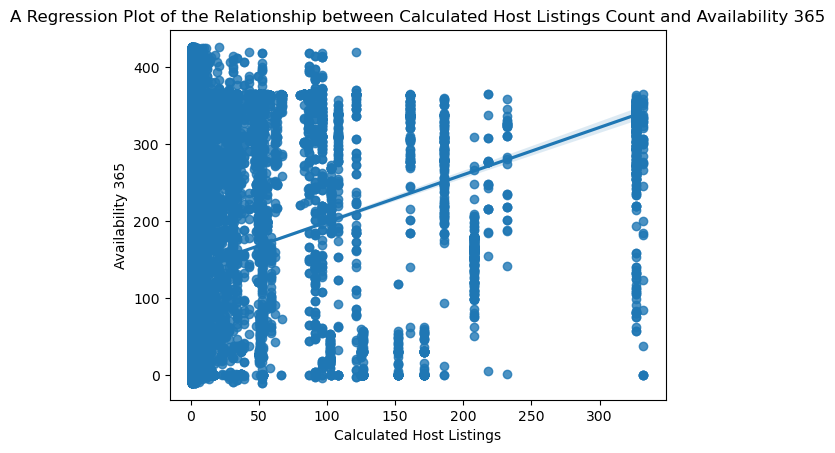

In [55]:
sns.regplot(df,x='calculated host listings count',y='availability 365');
plt.xlabel('Calculated Host Listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365');

In [56]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.13598552736758698)